# Linear Regression 실습

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

## 1. Univariate Regression
### 1.1 Sample Data

In [2]:
X = np.array([1, 2, 3, 4])
y = np.array([2, 1, 4, 3])

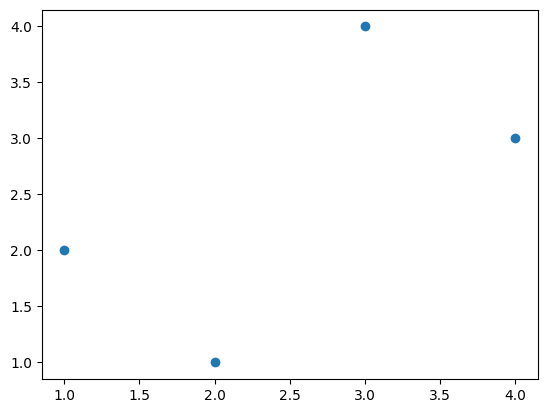

In [4]:
plt.scatter(X, y)

### 1.2 Data 변환
scikit-learn에서 모델 학습을 위한 데이터는 (n, c) 형태로 되어있어야 함  
- n: 데이터 개수
- c: feature 개수

실습에서 사용할 데이터는 4개의 데이터와 1개의 feature로 구성되어있음 

In [6]:
X

array([1, 2, 3, 4])

In [7]:
X.shape

(4,)

In [8]:
data = X.reshape(-1, 1)

In [9]:
data

array([[1],
       [2],
       [3],
       [4]])

In [10]:
data.shape

(4, 1)

1.3 Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()

#### 1.3.1 학습하기
scikit-learn 패키지의 LinearRegression을 이용해 선형 회귀 모델을 생성하기  
model 학습은 `fit` 함수를 이용해 진행
```py
model.fit(X=data, y=y)
```
X는 학습에 사용될 데이터, y는 학습에 사용될 정답

In [15]:
model.fit(X=data, y=y)
# model.fit(data, y)

LinearRegression()

#### 1.3.2 모델의 식 확인
`intercept_` 이용해 bias 확인하기

In [16]:
model.intercept_

1.0000000000000004

`coef_` 이용해 회귀계수 확인하기

In [17]:
model.coef_

array([0.6])

결과로 얻은 회귀 선은 $y = 1.0000000000000004 + 0.6x$

#### 1.3.3 예측하기
모델 예측은 predict 함수 이용해 수행

In [18]:
pred = model.predict(data)

In [19]:
# 예측 결과
pred

array([1.6, 2.2, 2.8, 3.4])

#### 회귀선을 Plot으로 표현하기

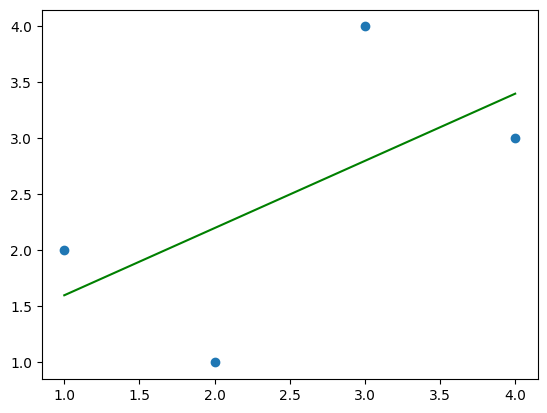

In [20]:
plt.scatter(X, y)
plt.plot(X, pred, color='green')

## Multivariate Regression
### 2.1 Sample Data
Multivariate Regression에서 사용할 데이터 생성 후 학습된 회귀식과 비교해보기

In [23]:
# 정답 함수 미리 생성 (추후 모델 학습 결과와 비교 예정)

bias = 1
beta = np.array([2, 3, 4, 5]).reshape(4, 1)
noise = np.random.randn(100,  1)

In [24]:
X = np.random.randn(100, 4)
y = bias + X.dot(beta)
y_with_noise = y + noise

In [25]:
X[:10]

array([[-0.92491748,  1.01010697,  0.75532068,  0.8542725 ],
       [ 0.70907623,  0.82063592,  0.12924242,  0.07362991],
       [-0.25463986,  0.06335837, -1.04382927, -0.49253452],
       [-0.07391736, -0.70858413, -1.17559885, -0.18630462],
       [-0.93512731, -0.63486372, -0.34630601, -0.89884076],
       [-0.38668958, -0.04981271, -0.10903973,  0.92254037],
       [-1.40224516, -0.52794229,  0.24598887,  0.46796635],
       [-1.04888982, -0.40914421,  0.76159409, -0.54284424],
       [ 1.30851964, -0.65026402,  1.13955461,  0.82361744],
       [-0.41900002,  1.3898197 ,  0.45184264, -1.86617727]])

In [26]:
y[:10]

array([[ 9.47313116],
       [ 5.76517945],
       [-5.95719428],
       [-6.90750566],
       [-8.65427365],
       [ 4.25372563],
       [-0.06452996],
       [-1.99305712],
       [10.34255284],
       [-3.19205674]])

### 2.2 Multivariate Regression

In [27]:
model = LinearRegression()
model.fit(X, y_with_noise)

LinearRegression()

### 2.3 회귀식 확인하기

In [28]:
model.intercept_

array([1.01234872])

In [29]:
model.coef_

array([[1.98644303, 3.07022087, 3.95282693, 5.01216863]])

위에서 정의한 bias, beta와 유사하게 나온 것을 확인할 수 있음

### 2.4 통계적 방법
통계적 방법으로 회귀식을 계산  
$\boldsymbol{\beta} = (X^TX)^{-1}X^Ty$

In [35]:
bias_X = np.array([1]*len(X)).reshape(-1, 1)
stat_X = np.hstack([bias_X, X])
X_X_transpose = stat_X.transpose().dot(stat_X)
X_X_transpose_inverse = np.linalg.inv(X_X_transpose)  # 역행렬 구하는 함수

In [33]:
stat_beta = X_X_transpose_inverse.dot(stat_X.transpose()).dot(y_with_noise)

In [34]:
stat_beta

array([[1.01234872],
       [1.98644303],
       [3.07022087],
       [3.95282693],
       [5.01216863]])

## Polynomial Regression

### 3.1 Sample Data
비선형 데이터를 생성

In [48]:
bias = 1
beta = np.array([2, 3]).reshape(2, 1)
noise = np.random.randn(100, 1)

In [49]:
X = np.random.randn(100, 1)
X_poly = np.hstack([X, X**2])

In [50]:
X_poly[:10]

array([[-1.76032731e+00,  3.09875222e+00],
       [ 1.16610305e+00,  1.35979633e+00],
       [ 4.91710199e-01,  2.41778920e-01],
       [-8.02142511e-01,  6.43432607e-01],
       [ 6.24904809e-01,  3.90506020e-01],
       [ 1.43160874e-01,  2.04950357e-02],
       [-3.36336888e-01,  1.13122502e-01],
       [-3.23460700e-01,  1.04626825e-01],
       [ 1.30698158e+00,  1.70820084e+00],
       [-2.83035916e-02,  8.01093296e-04]])

In [51]:
y = bias + X_poly.dot(beta)
y_with_noise = y + noise

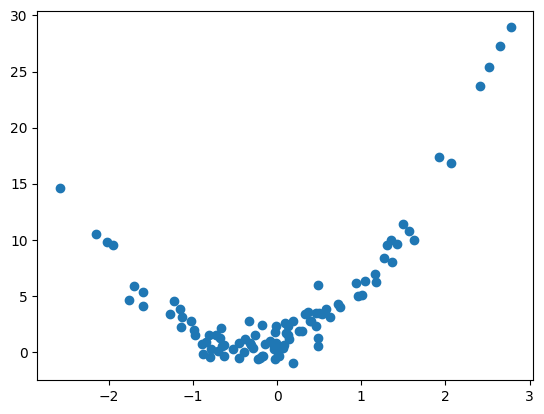

In [52]:
plt.scatter(X, y_with_noise)

### 3.2 Polynomial Regression
#### 3.2.1 학습하기

In [53]:
model = LinearRegression()
model.fit(X_poly, y_with_noise)

LinearRegression()

#### 3.2.2 회귀식 확인하기
앞에서 정의한 bias와 beta와 값이 유사한지 확인

In [56]:
# bias = 1
model.intercept_

array([0.96501686])

In [58]:
# beta = array([[2], [3]])
model.coef_

array([[2.05641242, 2.9530699 ]])

#### 3.2.3 예측하기

In [60]:
pred = model.predict(X_poly)

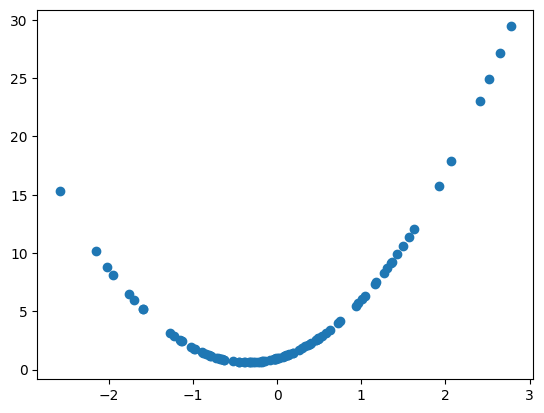

In [61]:
plt.scatter(X, pred)